In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import sklearn 
import matplotlib as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/CO2 Emissions_Canada.csv')

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
data.nunique(axis=0)

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

### Setting up a project images folder

In [7]:

IMG_PATH = Path() /'images'/'cleanest_cars_project'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#source: Ageron handson-ml3

Looking at the distribution of numerical values

In [8]:
num_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
           'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

In [9]:
numeric_ftrs = data[num_cols]

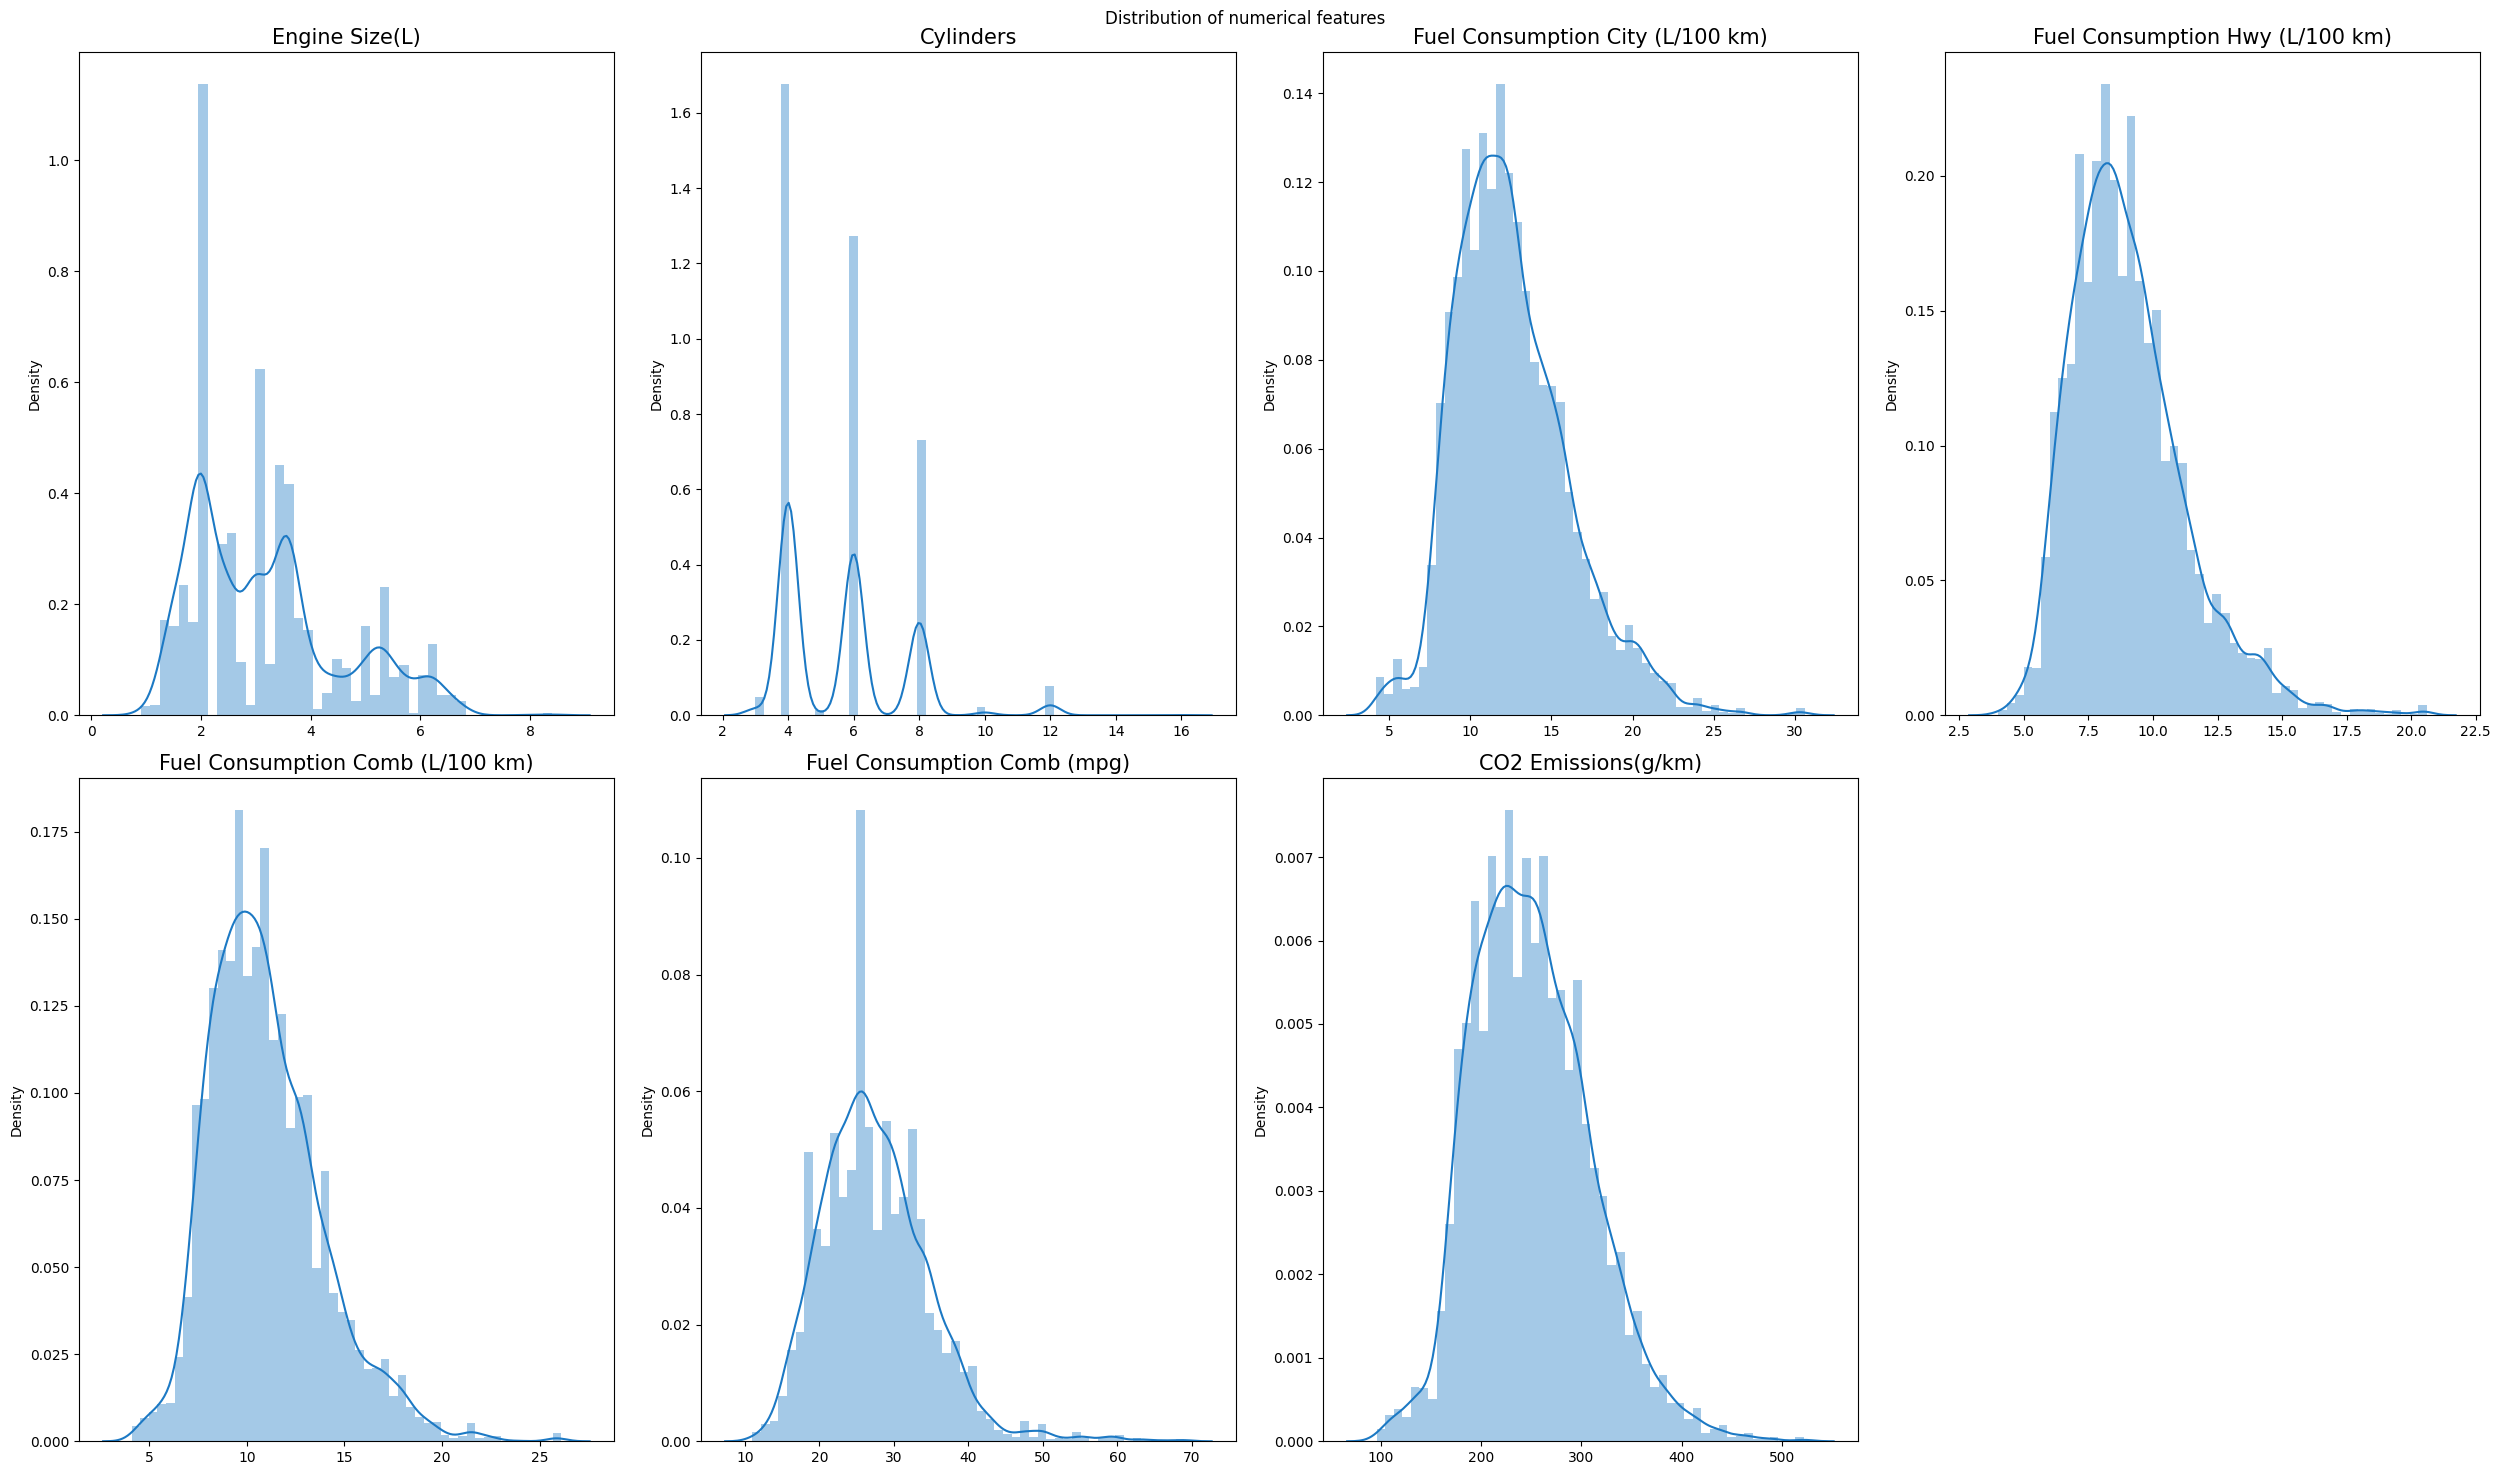

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plt.suptitle('Distribution of numerical features')
plt.subplots_adjust(top=0.93, wspace=0.5)

for i in range(len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x=data[num_cols[i]], color='#1C79C4')
    variable = num_cols[i]
    plt.title(variable, fontsize=15)
    
save_fig('numeric_features_distplots')
plt.show();

### Generating test set 

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('Train set:', len(train_set))
print('Test set:', len(test_set))

Train set: 5908
Test set: 1477


In this particular dataset, it is difficult to select unique features to assign as an ID. As such, Index will be used though there are challenges with this approach. The main challenge is that if new data is ever added, it would need to be appended at the end of the data to continue index values, otherwise the order is lost. Seeing as though this is a practice project we will continue with this approach. 

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def train_test_split_by_id(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
data_with_id = data.reset_index() 
train_set, test_set = train_test_split_by_id(data_with_id, 0.2, 'index')

Creating a Cylinders category

In [14]:
data['cylinders_cat'] = pd.cut(data['Cylinders'],
                              bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [16]:
strat_test_set['Cylinders'].value_counts() / len(strat_test_set)

4     0.436019
6     0.331077
8     0.190251
12    0.020311
3     0.012864
10    0.005416
5     0.003385
16    0.000677
Name: Cylinders, dtype: float64

Dropping the column from data

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('cylinders_cat', axis=1, inplace=True)

### Exploration of training set

In [18]:
data = strat_train_set.copy()

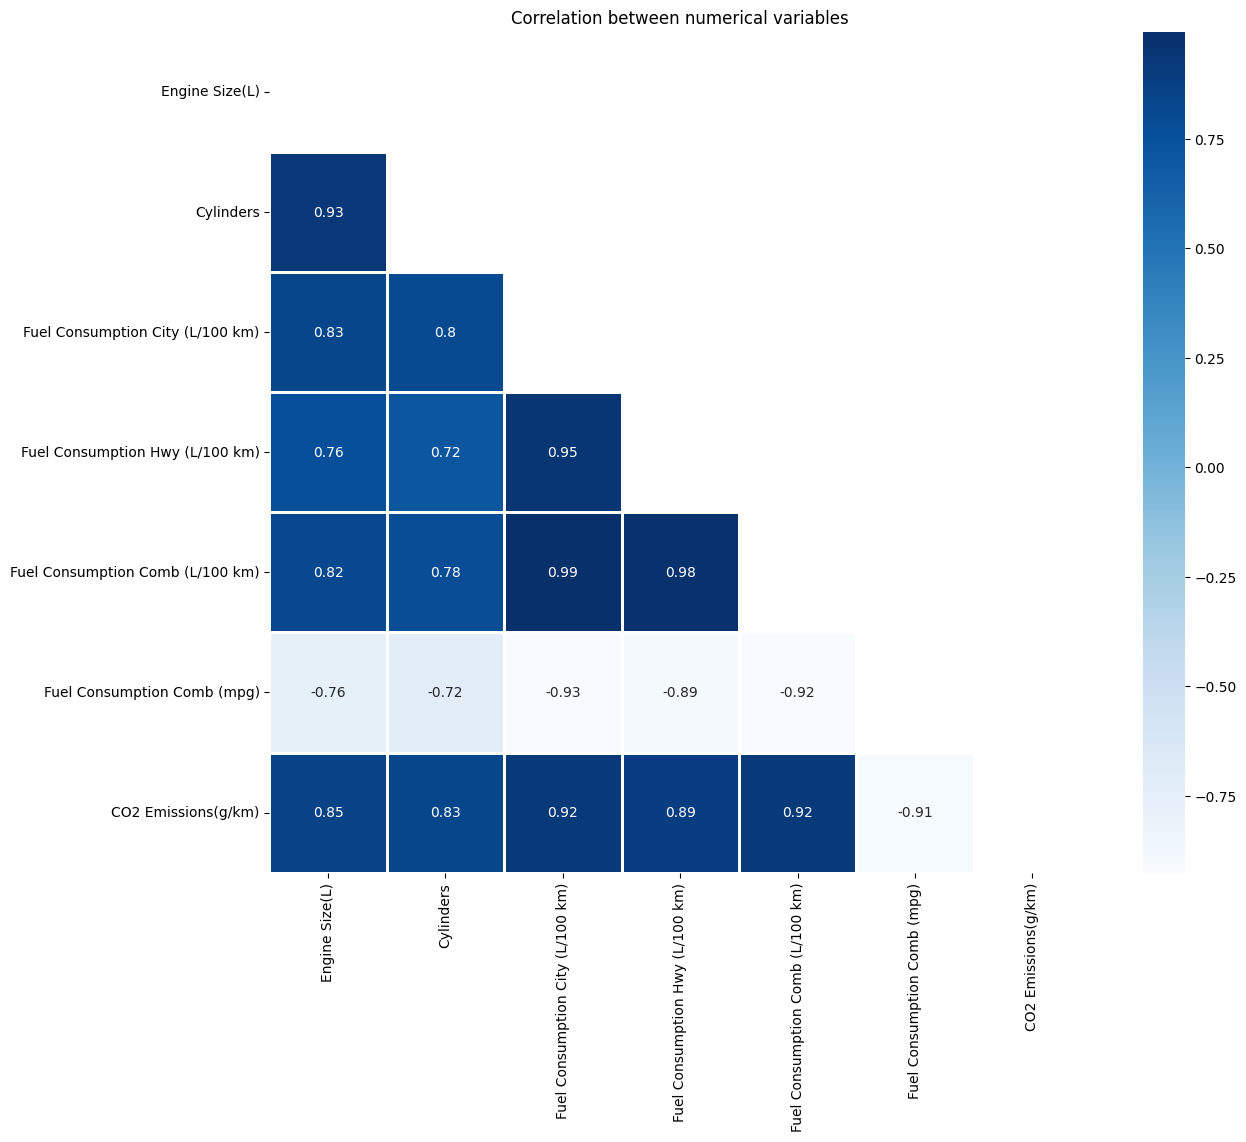

In [19]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
save_fig('variable_correlations')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.color_palette("Blues",as_cmap=True), mask=mask, cbar=True, 
            linecolor='white', linewidth=2).set(title='Correlation between numerical variables');



Printing standard deviation for the numerical features

In [20]:
for i in range(len(num_cols)):
    print(num_cols[i] + ': ' + '\n', data[num_cols[i]].std(), '\n')
    

Engine Size(L): 
 1.3544510736673308 

Cylinders: 
 1.8269201112979256 

Fuel Consumption City (L/100 km): 
 3.494349831405875 

Fuel Consumption Hwy (L/100 km): 
 2.2235544614170237 

Fuel Consumption Comb (L/100 km): 
 2.888231253512234 

Fuel Consumption Comb (mpg): 
 7.225489622455911 

CO2 Emissions(g/km): 
 58.553493508062026 



In [21]:
corr_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)' ]


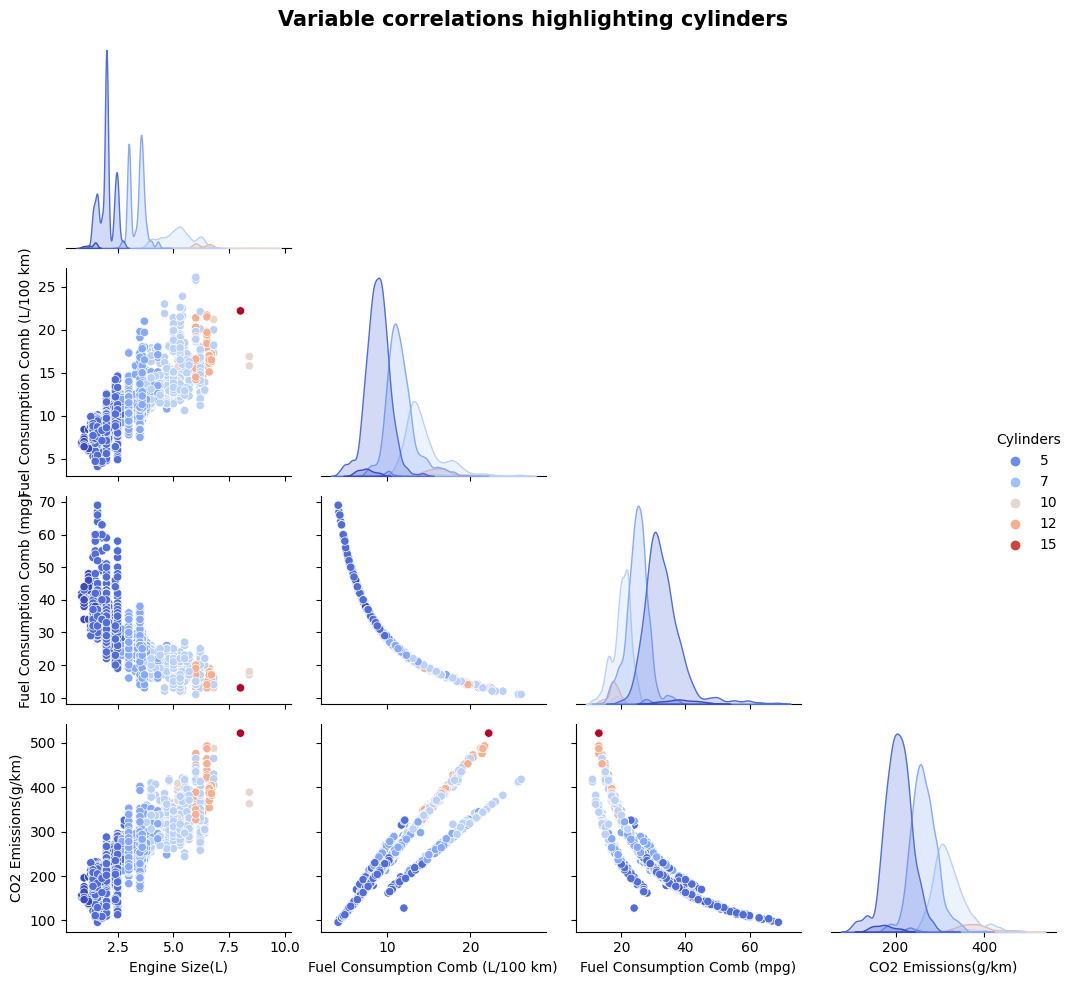

In [22]:
datapplot = sns.pairplot(data[corr_features], hue='Cylinders', corner=True, palette='coolwarm')
datapplot.fig.suptitle('Variable correlations highlighting cylinders', fontsize='15', fontweight='bold');
save_fig('scatter_plot_cylinder_highlight')

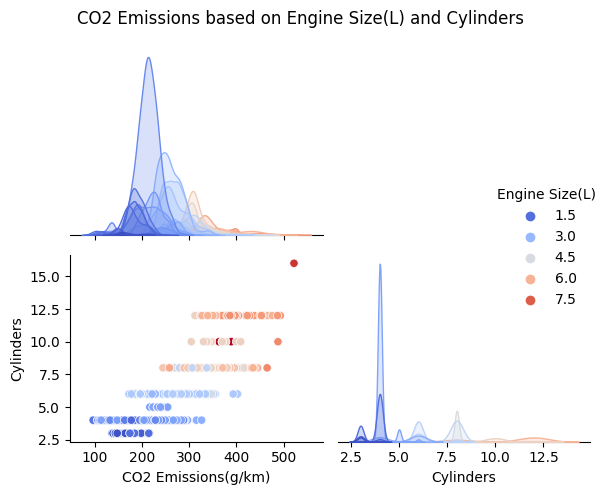

In [23]:
#Engine size information
engn = ['Engine Size(L)','CO2 Emissions(g/km)', 'Cylinders']

# print(data[engn])
engn_data = sns.pairplot(data[engn], hue='Engine Size(L)', corner=True, palette='coolwarm')
engn_data.fig.suptitle('CO2 Emissions based on Engine Size(L) and Cylinders');
save_fig('Scatter_plot_engine_size_CO2')

###  Preparing dataset for model feed

In [24]:
car_df = strat_train_set.copy()
car_labels = strat_train_set['CO2 Emissions(g/km)'].copy()

To clean the data, let's first deal with empty values in the data set. We'll use SimpleImputer to replace null values with the median of value of that column. We will need to separate numeric and categorical values since we can't calculate the median for categorical values.

#### Preparing numerical values 

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [26]:
#separate categorical values

cat_vals = ['Make', 'Model', 'Vehicle Class', 'Transmission', 
           'Fuel Type',]

In [27]:
car_nums = car_df.drop(cat_vals, axis=1)
car_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5908 entries, 6096 to 3051
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    5908 non-null   float64
 1   Cylinders                         5908 non-null   int64  
 2   Fuel Consumption City (L/100 km)  5908 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 5   Fuel Consumption Comb (mpg)       5908 non-null   int64  
 6   CO2 Emissions(g/km)               5908 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 369.2 KB


#### Creating number pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


#### Transforming categorical column

In [29]:
car_df_cat = car_df['Vehicle Class']
car_df_cat

6096                  FULL-SIZE
5429      STATION WAGON - SMALL
6874    PICKUP TRUCK - STANDARD
847        PICKUP TRUCK - SMALL
2207                   MID-SIZE
                 ...           
1520             SUV - STANDARD
6975                SUV - SMALL
2536             SUV - STANDARD
5179                 TWO-SEATER
3051                    COMPACT
Name: Vehicle Class, Length: 5908, dtype: object

#### Creating full pipeline

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing


num_attribs = list(car_nums)
cat_attribs = ['Vehicle Class']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', preprocessing.OneHotEncoder(), cat_attribs)
])

cars_prepared = full_pipeline.fit_transform(car_df)

In [31]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
scaler = StandardScaler()
le.fit(car_df_cat)
v_class_le = le.transform(car_df_cat)
v_class_le

array([ 1,  9,  6, ..., 12, 13,  0])

In [32]:
v_class_le = pd.DataFrame(v_class_le, columns=['Vehicle Class'])
transformed_cat = scaler.fit_transform(v_class_le)
cat_prepared = pd.DataFrame(transformed_cat, columns=v_class_le.columns )
cat_prepared


,Vehicle Class
0,-1.102909
1,0.553049
2,-0.067935
3,-0.274930
4,-0.895914
...,...
5903,1.174033
5904,0.967038
5905,1.174033
5906,1.381027


In [33]:
# transformed_df = pd.concat([nums_prepared, cat_prepared], axis=1).astype(float)
# transformed_df

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, car_labels)

LinearRegression()

In [35]:
sample_data = data.iloc[:5]
sample_label = car_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print('Predictions:', lin_reg.predict(sample_data_prepared))
print('Labels:', list(sample_label))


Predictions: [281. 199. 265. 301. 235.]
Labels: [281, 199, 265, 301, 235]


In [36]:
from sklearn.metrics import mean_squared_error

cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(car_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.080547067538497e-14